# Exploration der Word2vec Embeddings 5

- ohne Bigramme
- vector_size: 300
- window: 20
- min_count: 2
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v11.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1985', '1986-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.2857457101345062,
 '1751-1800': 0.4005852937698364,
 '1801-1825': 0.4058414101600647,
 '1826-1850': 0.40214449167251587,
 '1851-1875': 0.42682328820228577,
 '1876-1900': 0.35657891631126404,
 '1901-1925': 0.3644394278526306,
 '1926-1950': 0.37185412645339966,
 '1951-1985': 0.32593825459480286,
 '1986-2000': 0.38918519020080566,
 '2001-2021': 0.4596385359764099}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

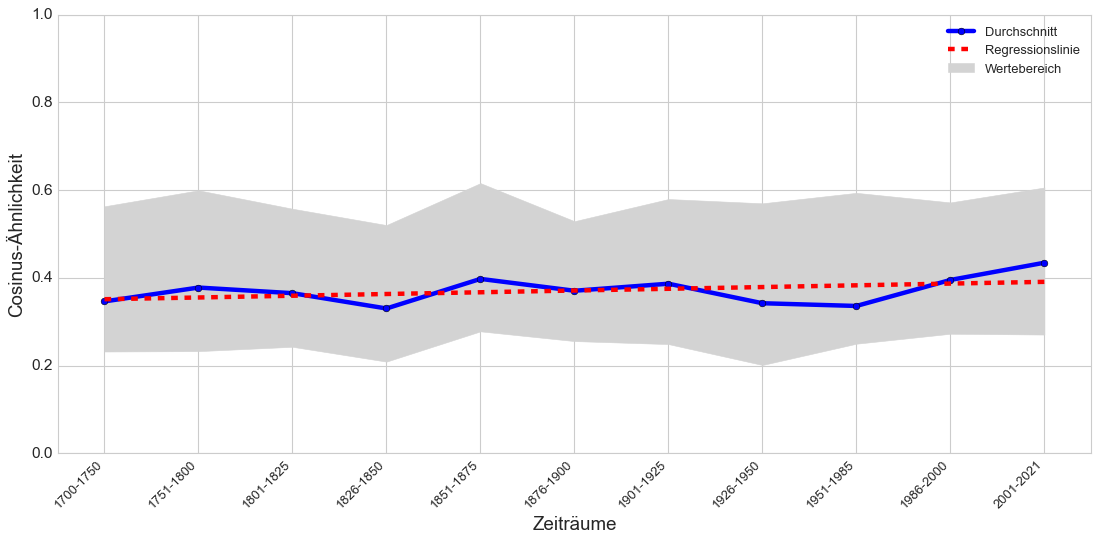

In [14]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [15]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

#domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])
domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [16]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [17]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [18]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [19]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [20]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [21]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [22]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere5 = compare_cos(periods, models, 'essere', 'raccapricciare')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

#essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])
essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])

# Durchschnitt pro Zeitraum
essere_mean = dict(essere_df.mean())

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [23]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere5 = compare_cos(periods, models, 'avere', 'raccapricciare')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

#avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])
avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])

# Durchschnitt pro Zeitraum
avere_mean = dict(avere_df.mean())

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [24]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, 
                                spesso_mean, essere_mean, avere_mean])
control_mean = dict(control_mean_df.mean())

In [25]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, 
                               spesso_min, essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [26]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, 
                               spesso_max, essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

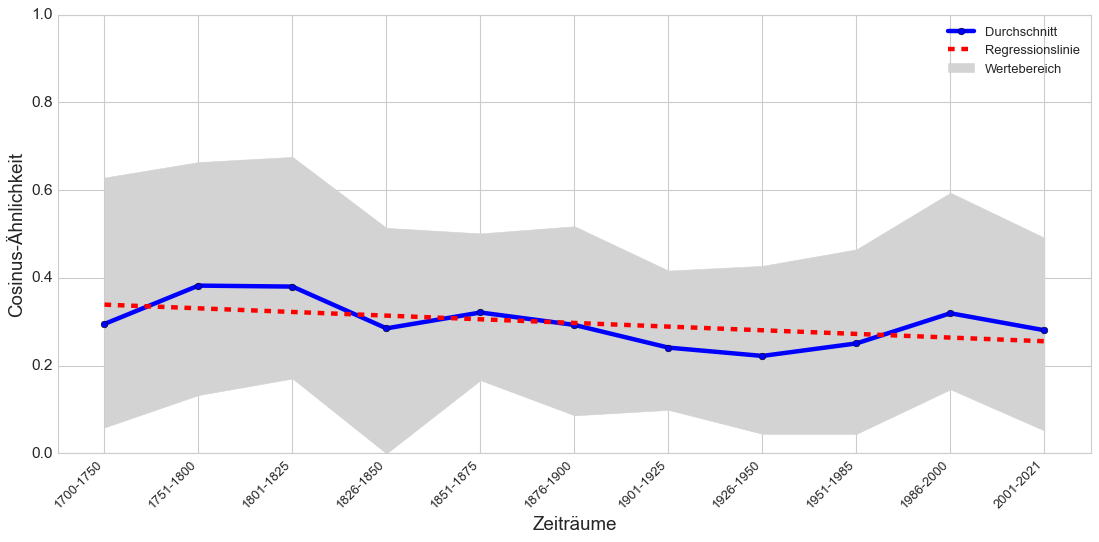

In [27]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [28]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(pigliarne, 0.9596980214118958)","(irriverenza, 0.9813902974128723)","(declamatore, 0.9106867909431458)","(castigo, 0.9028705954551697)","(maledizione, 0.8445013761520386)","(scatenato, 0.7533658742904663)","(ingiuriare, 0.7385556697845459)","(fatta, 0.7521222829818726)","(fantasticare, 0.8392427563667297)","(degradazione, 0.8361039757728577)","(mutilare, 0.8418835401535034)"
1,"(osar, 0.9571243524551392)","(punirsi, 0.9719143509864807)","(palafreniere, 0.9105638265609741)","(insidiare, 0.9003481268882751)","(codardo, 0.8384930491447449)","(scatenare, 0.7429999709129333)","(misfatto, 0.7194483876228333)","(ignaro, 0.7477831840515137)","(macerare, 0.8285391926765442)","(tragicamente, 0.8171125054359436)","(orribilmente, 0.8182774782180786)"
2,"(giuraste, 0.9568704962730408)","(reciprochi, 0.967674970626831)","(appormi, 0.9104947447776794)","(sanguinario, 0.896574079990387)","(parricida, 0.8383357524871826)","(ingiurioso, 0.742631196975708)","(nefando, 0.7174885272979736)","(represso, 0.7433392405509949)","(delirare, 0.8236978650093079)","(menzogna, 0.8095457553863525)","(orribile, 0.8143581748008728)"
3,"(sdegnandosi, 0.9536839723587036)","(proscriversi, 0.9662511348724365)","(sceleratezza, 0.9078121185302734)","(impunit, 0.8945943117141724)","(rampogna, 0.8343285918235779)","(saulle, 0.7351394295692444)","(tirannide, 0.7166377305984497)","(sammartino, 0.7403092980384827)","(fardello, 0.8105424046516418)","(atroce, 0.8091985583305359)","(carceriere, 0.8085741400718689)"
4,"(infimi, 0.9527414441108704)","(facilitato, 0.965337336063385)","(riconosciuta, 0.9064447283744812)","(disobbedire, 0.8922635912895203)","(imprecare, 0.8331981897354126)","(calunnia, 0.7333213090896606)","(onta, 0.7001515030860901)","(mentire, 0.7345227003097534)","(ribrezzo, 0.805241048336029)","(nevrosi, 0.8002457618713379)","(empio, 0.8017174601554871)"
5,"(difendetemi, 0.9521632194519043)","(intercette, 0.965297520160675)","(immanit, 0.9064229130744934)","(immolare, 0.8900977373123169)","(carnefice, 0.8235619068145752)","(invettiva, 0.7312352657318115)","(fiaccare, 0.7000729441642761)","(immensa, 0.7340925335884094)","(sfilacciamento, 0.8046510815620422)","(profanazione, 0.7981809973716736)","(sahr, 0.7963438630104065)"
6,"(abborrisca, 0.952019453048706)","(tarsi, 0.9652108550071716)","(alzandoci, 0.9061338901519775)","(abbietti, 0.8878227472305298)","(nefando, 0.8220605850219727)","(mutilato, 0.7307654619216919)","(cristianamente, 0.6888169050216675)","(supplizio, 0.7267124056816101)","(indifeso, 0.8013614416122437)","(morente, 0.7974491119384766)","(dèi, 0.7917436957359314)"
7,"(aborrisci, 0.9517057538032532)","(presentaneo, 0.9643799066543579)","(arrecata, 0.9058699011802673)","(anzichè, 0.8876821398735046)","(obbrobrio, 0.8176475763320923)","(impudenza, 0.7303189039230347)","(offeso, 0.6886113882064819)","(sofferse, 0.7242097854614258)","(martirii, 0.8005440831184387)","(simbologia, 0.7906512022018433)","(torturare, 0.7855145931243896)"
8,"(senon, 0.9516981244087219)","(incapacit, 0.9640414714813232)","(soffogarle, 0.9057900905609131)","(umiliare, 0.8837537169456482)","(malvagità, 0.8169151544570923)","(ostile, 0.7235446572303772)","(intemerato, 0.681850016117096)","(provandolo, 0.7239463329315186)","(carnale, 0.7943434715270996)","(crudeltà, 0.7859901785850525)","(zee, 0.7820996046066284)"
9,"(onnipotenti, 0.9516432285308838)","(reprobo, 0.964016854763031)","(riputerebbero, 0.9053835868835449)","(attizzare, 0.8834173083305359)","(contristare, 0.8156167268753052)","(ispirato, 0.7220022082328796)","(scellerato, 0.6812711358070374)","(inimicizia, 0.7198137640953064)","(invincibile, 0.7926256656646729)","(manicomio, 0.7847698926925659)","(feroce, 0.7817969918251038)"


In [29]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.5542564392089844,
 '1751-1800': 0.5395386219024658,
 '1801-1825': 0.4916425049304962,
 '1826-1850': 0.3394017219543457,
 '1851-1875': 0.4376507103443146,
 '1876-1900': 0.4071546196937561,
 '1901-1925': 0.2693921625614166,
 '1926-1950': 0.2357240915298462,
 '1951-1985': 0.30153632164001465,
 '1986-2000': 0.35271361470222473,
 '2001-2021': 0.3168312609195709}

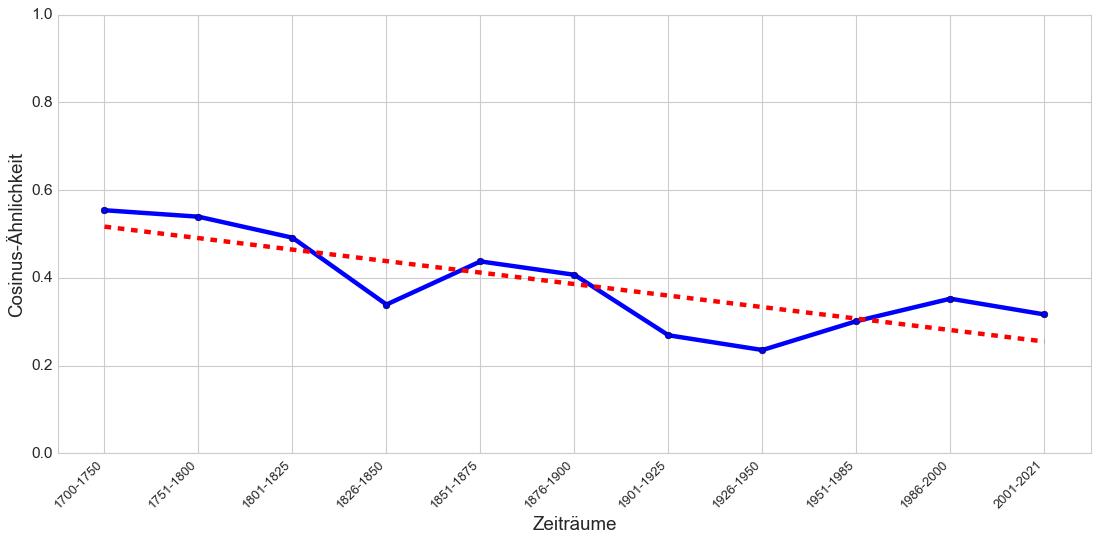

In [30]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

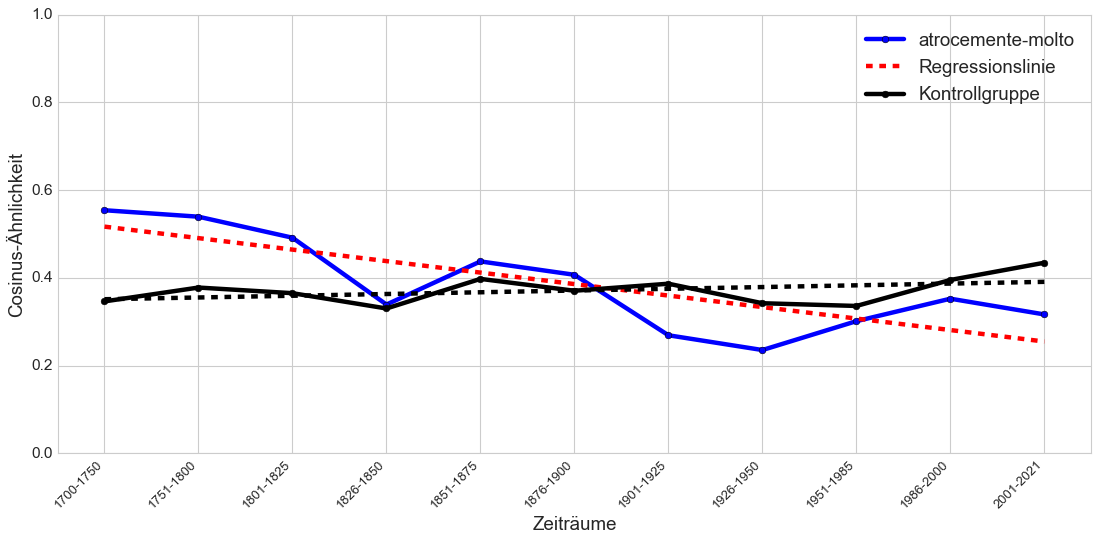

In [31]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [32]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [33]:
atrocemente1

{'1700-1750': 0.689035952091217,
 '1751-1800': 0.667334258556366,
 '1801-1825': 0.5663549900054932,
 '1826-1850': 0.5433589220046997,
 '1851-1875': 0.6428905129432678,
 '1876-1900': 0.5383320450782776,
 '1901-1925': 0.42930272221565247,
 '1926-1950': 0.5483558773994446,
 '1951-1985': 0.4573212265968323,
 '1986-2000': 0.5907351970672607,
 '2001-2021': 0.7133005857467651}

In [34]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

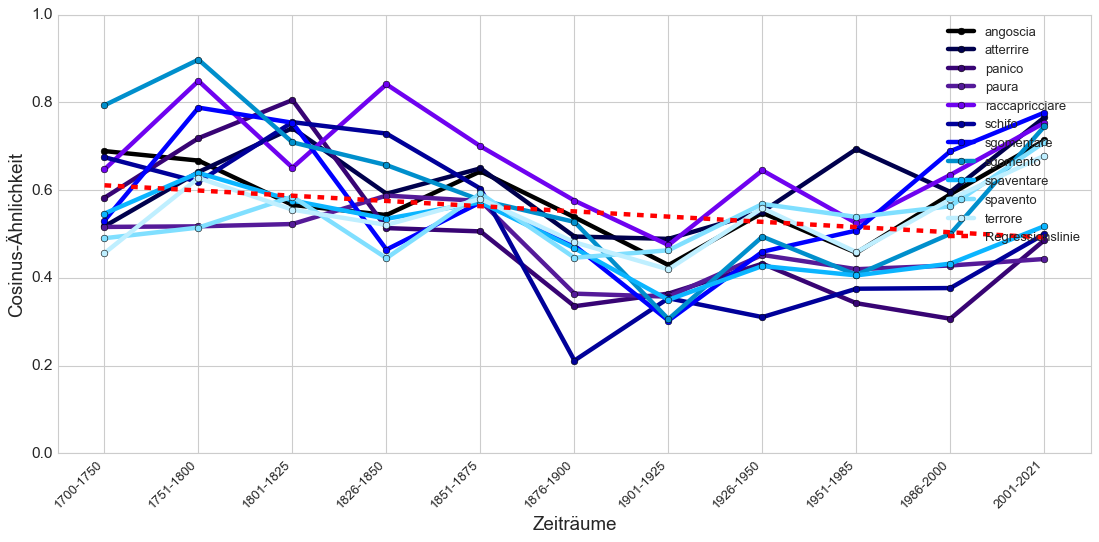

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

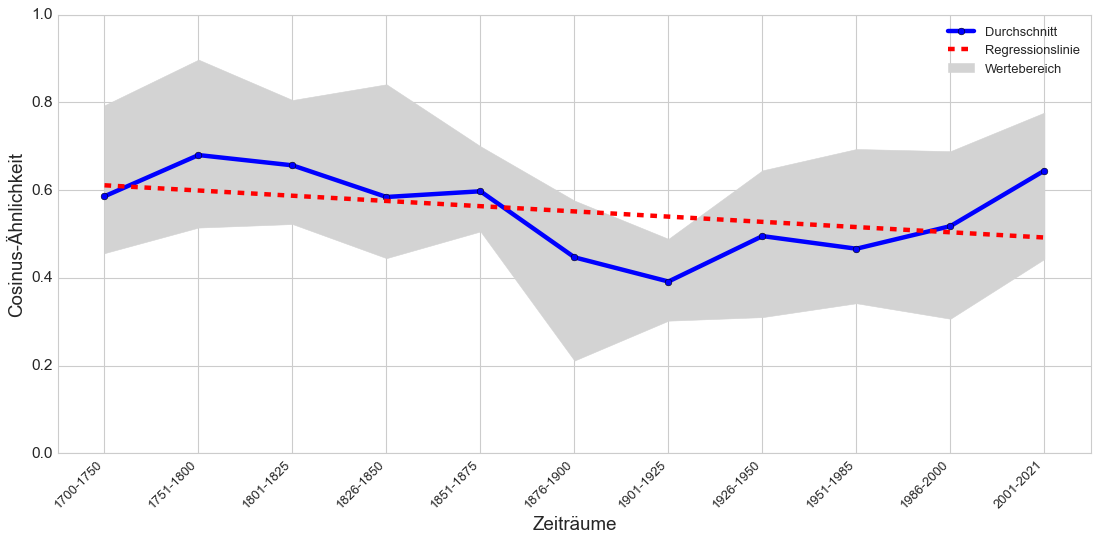

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

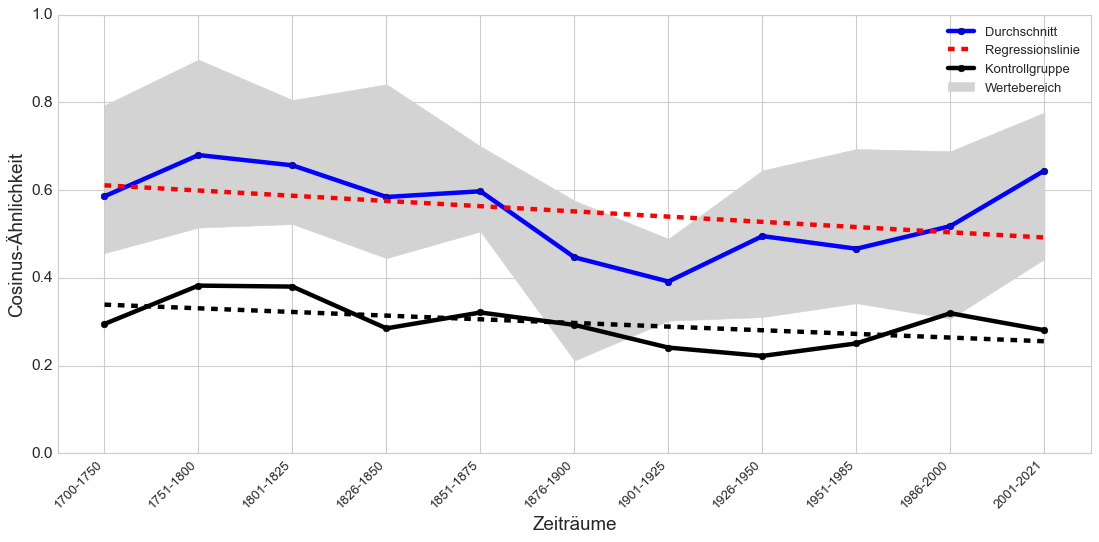

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [38]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(deformare, 0.9603480696678162)",not in vocab,"(acciacco, 0.9691625237464905)",not in vocab,"(ripugnanze, 0.916413426399231)","(inebriò, 0.8998012542724609)","(vigoria, 0.7744262218475342)","(aggiustava, 0.8076518177986145)","(sauriani, 0.9188926815986633)","(immerso, 0.7886863946914673)","(platone, 0.7613815665245056)"
1,"(redenzione, 0.9407815337181091)",not in vocab,"(meritorio, 0.9679701924324036)",not in vocab,"(disappunto, 0.908780574798584)","(ferino, 0.8964152336120605)","(rammorbidiva, 0.7696347236633301)","(incedere, 0.8004106879234314)","(preistorico, 0.830461859703064)","(ingegno, 0.7772960662841797)","(sfuggente, 0.7594012022018433)"
2,"(ammirati, 0.9400873184204102)",not in vocab,"(volgasi, 0.9671795964241028)",not in vocab,"(raffrenare, 0.908623456954956)","(efebo, 0.89485102891922)","(mollezza, 0.76246178150177)","(verdastri, 0.7985983490943909)","(astrofisico, 0.8166614770889282)","(espandere, 0.7681676149368286)","(statura, 0.7585933208465576)"
3,"(insipiente, 0.9390973448753357)",not in vocab,"(emancipazione, 0.9671014547348022)",not in vocab,"(confortarmi, 0.9057117700576782)","(rinnovellata, 0.8944293856620789)","(angolosità, 0.7622278332710266)","(smisuratamente, 0.7979491949081421)","(argilloso, 0.8158397674560547)","(indecifrabile, 0.7623844146728516)","(kwasskallak, 0.7563393712043762)"
4,"(corrottella, 0.934695303440094)",not in vocab,"(vestirli, 0.9656875133514404)",not in vocab,"(disdegno, 0.8978348970413208)","(paragonabile, 0.8922038674354553)","(contorsione, 0.7578707337379456)","(fissità, 0.796072781085968)","(sformare, 0.8133538365364075)","(spaventosamente, 0.761151134967804)","(crosta, 0.7467010617256165)"
5,"(sconcerti, 0.9337412714958191)",not in vocab,"(confortarli, 0.965057909488678)",not in vocab,"(pensar, 0.8970718383789062)","(omicida, 0.8918966054916382)","(prodigioso, 0.7528883218765259)","(occhialone, 0.7891630530357361)","(prosciugare, 0.8126986026763916)","(sfuggente, 0.7549512386322021)","(insignificante, 0.739501416683197)"
6,"(diverr, 0.933146059513092)",not in vocab,"(magrini, 0.9644355773925781)",not in vocab,"(sconfortante, 0.8955311179161072)","(bilioso, 0.8905928730964661)","(prodigiosamente, 0.7512578368186951)","(semisferici, 0.7807049751281738)","(malsano, 0.8111870288848877)","(circoscritto, 0.7539109587669373)","(heavy, 0.7366428971290588)"
7,"(aggiunsero, 0.9329688549041748)",not in vocab,"(trascur, 0.9640435576438904)",not in vocab,"(inebbriato, 0.895473301410675)","(invitto, 0.8905479907989502)","(incredibilmente, 0.7504240870475769)","(bluastro, 0.7746219038963318)","(abilit, 0.8097648620605469)","(inesorabilmente, 0.7535387277603149)","(tremendamente, 0.7358448505401611)"
8,"(ductile, 0.9326950907707214)",not in vocab,"(miscela, 0.9640278220176697)",not in vocab,"(attaccarmi, 0.8950283527374268)","(inalberano, 0.8902834057807922)","(attraenza, 0.7451967000961304)","(paurosamente, 0.7686785459518433)","(potabile, 0.8060484528541565)","(spanna, 0.752766489982605)","(carapace, 0.7354204058647156)"
9,"(minacciarla, 0.9318187832832336)",not in vocab,"(damman, 0.9637854099273682)",not in vocab,"(invulnerabile, 0.894839882850647)","(infuocatosi, 0.890112578868866)","(repugnanza, 0.7446563243865967)","(sbarrato, 0.7665839195251465)","(chastenet, 0.802513599395752)","(avviluppare, 0.7527316808700562)","(riconoscibile, 0.7349374890327454)"


In [39]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.5330359935760498,
 '1801-1825': 0.5433925986289978,
 '1851-1875': 0.5473456978797913,
 '1876-1900': 0.45067957043647766,
 '1901-1925': 0.4225858747959137,
 '1926-1950': 0.28555744886398315,
 '1951-1985': 0.42554500699043274,
 '1986-2000': 0.5343668460845947,
 '2001-2021': 0.45095503330230713}

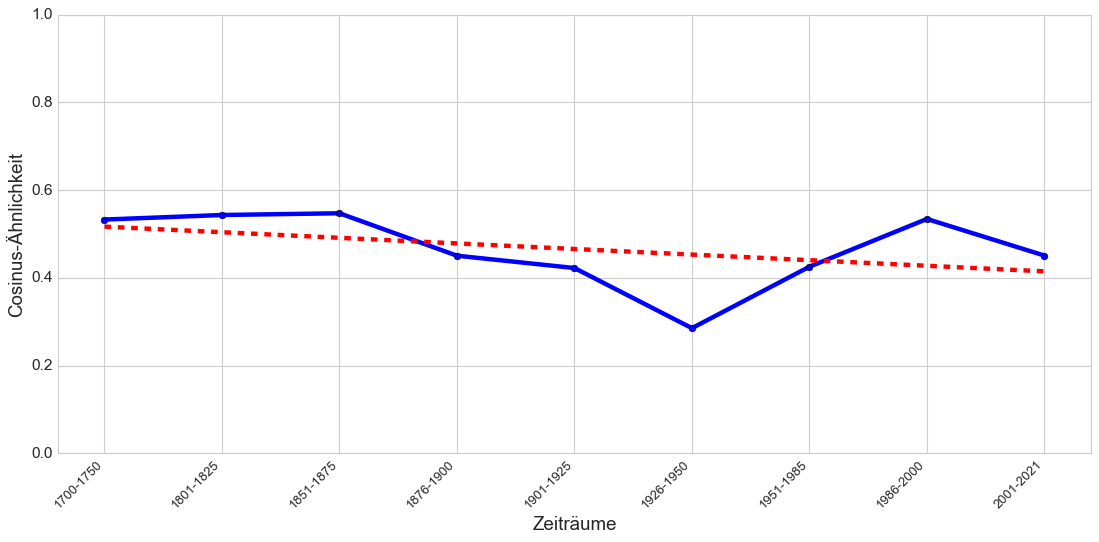

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [41]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [42]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

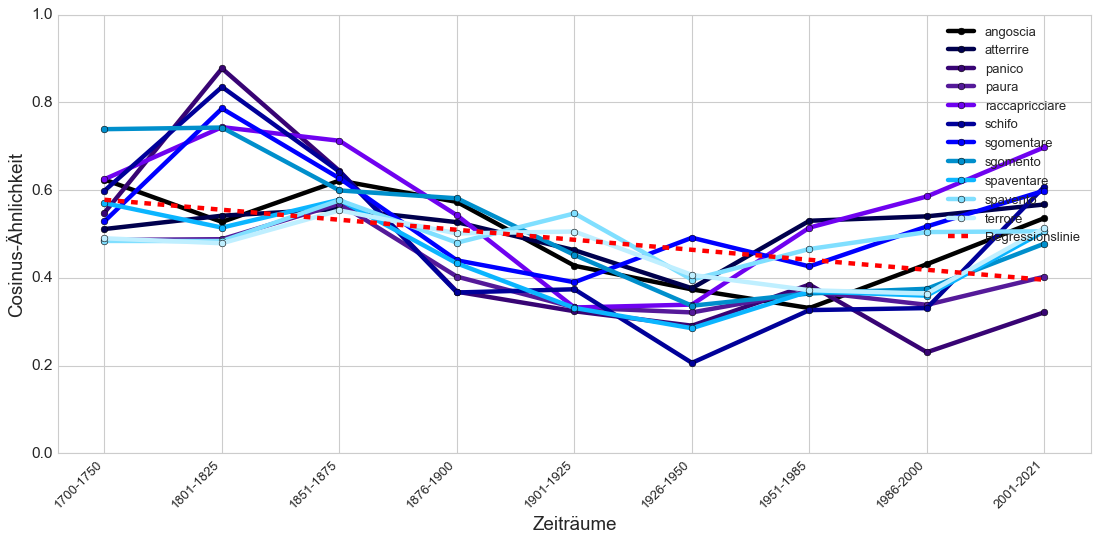

In [43]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

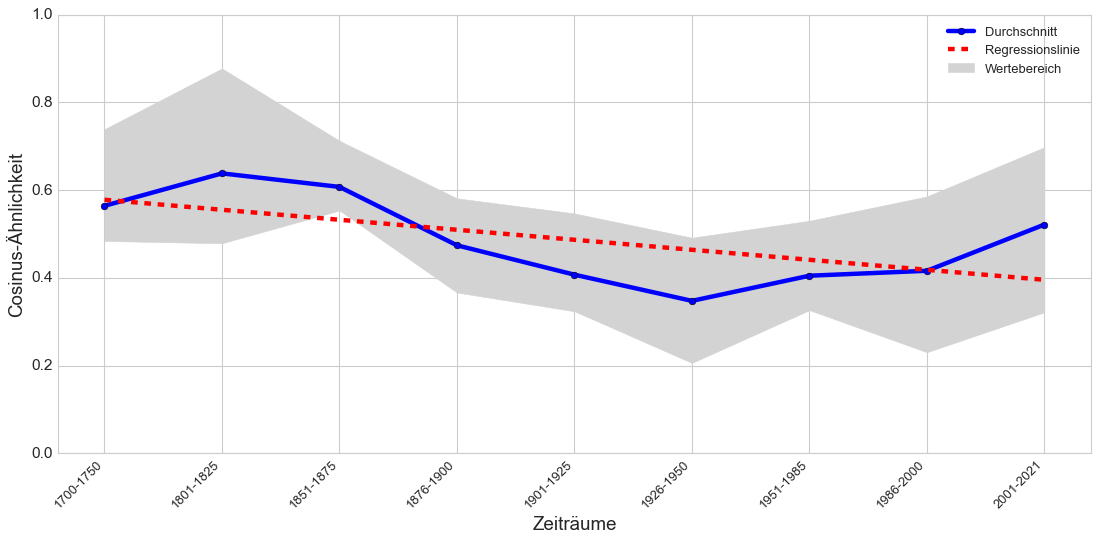

In [44]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [45]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(inisfela, 0.9520391821861267)","(pugnar, 0.9391207098960876)","(dilatato, 0.9413000345230103)","(trista, 0.7355921268463135)","(ruggiva, 0.8243984580039978)","(noncurante, 0.8517810702323914)","(larnano, 0.8205562233924866)","(mutilare, 0.8708957433700562)","(mutilare, 0.8415477871894836)"
1,not in vocab,not in vocab,"(scotendo, 0.9512469172477722)","(ugna, 0.9313455820083618)","(cadaverico, 0.9248442649841309)","(vessillo, 0.7110632658004761)","(mutilare, 0.8122532963752747)","(insanguinati, 0.8514094948768616)","(mutilato, 0.8116478323936462)","(mutilato, 0.848859965801239)","(zii, 0.8228570222854614)"
2,not in vocab,not in vocab,"(suonanti, 0.9426127672195435)","(trasse, 0.9299117922782898)","(occhiaia, 0.9190293550491333)","(leonessa, 0.7068166136741638)","(felino, 0.811984121799469)","(avvertiva, 0.8503119349479675)","(barella, 0.8095201849937439)","(dilaniare, 0.8478032350540161)","(ves, 0.8166149854660034)"
3,not in vocab,not in vocab,"(tede, 0.9411575794219971)","(invasata, 0.9292495250701904)","(infossati, 0.9176362752914429)","(sanguinoso, 0.7064722180366516)","(dilaniare, 0.8099582195281982)","(accartocciare, 0.8465645909309387)","(sirhan, 0.8046309947967529)","(sfigurato, 0.8428161144256592)","(orribilmente, 0.8018871545791626)"
4,not in vocab,not in vocab,"(levossi, 0.9401490092277527)","(balzar, 0.9243535399436951)","(disfatto, 0.9133977293968201)","(tradigione, 0.7008142471313477)","(spaccare, 0.7963266372680664)","(nerastro, 0.8407476544380188)","(martoriato, 0.7996939420700073)","(sfigurati, 0.8304104804992676)","(membra, 0.7868983149528503)"
5,not in vocab,not in vocab,"(ocean, 0.9373973608016968)","(penetr, 0.92408686876297)","(tumido, 0.9075374007225037)","(fucci, 0.6994853019714355)","(incendiata, 0.7915935516357422)","(sfracellati, 0.8385838866233826)","(ambulanza, 0.7986814975738525)","(sfigurare, 0.8279197216033936)","(diuz, 0.779522716999054)"
6,not in vocab,not in vocab,"(echeggianti, 0.9360730648040771)","(percotendo, 0.9239767789840698)","(aggrottate, 0.9072844386100769)","(siuno, 0.6986503005027771)","(uccise, 0.7882881760597229)","(fauce, 0.838229238986969)","(bismilha, 0.7927071452140808)","(straziato, 0.8275620937347412)","(cloo, 0.7741084098815918)"
7,not in vocab,not in vocab,"(empie, 0.9359683990478516)","(sonito, 0.9204655885696411)","(fiammeggiante, 0.9071537256240845)","(infocata, 0.6970155239105225)","(capellini, 0.7871707081794739)","(svertebrano, 0.8354446291923523)","(asportare, 0.7923198938369751)","(carbonizzare, 0.8083913326263428)","(sahr, 0.773159384727478)"
8,not in vocab,not in vocab,"(ululato, 0.9353737235069275)","(muojano, 0.9202895760536194)","(semiaperto, 0.9031472206115723)","(nerone, 0.6962445378303528)","(squarciare, 0.7863466739654541)","(melma, 0.8354129195213318)","(eslpodere, 0.7920067310333252)","(irriconoscibile, 0.807537317276001)","(malvagio, 0.7728736400604248)"
9,not in vocab,not in vocab,"(pelago, 0.9350488781929016)","(piegar, 0.9185933470726013)","(sanguigno, 0.900865375995636)","(mioil, 0.6961554288864136)","(palestro, 0.7763001918792725)","(serpentino, 0.8299229145050049)","(antiuomo, 0.791822612285614)","(barbaramente, 0.8017194271087646)","(zee, 0.7703455090522766)"


In [46]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1801-1825': 0.3273180425167084,
 '1826-1850': 0.30475056171417236,
 '1851-1875': 0.3605656921863556,
 '1876-1900': 0.30478596687316895,
 '1901-1925': 0.21441414952278137,
 '1926-1950': 0.16005922853946686,
 '1951-1985': 0.23320473730564117,
 '1986-2000': 0.2689906060695648,
 '2001-2021': 0.28154441714286804}

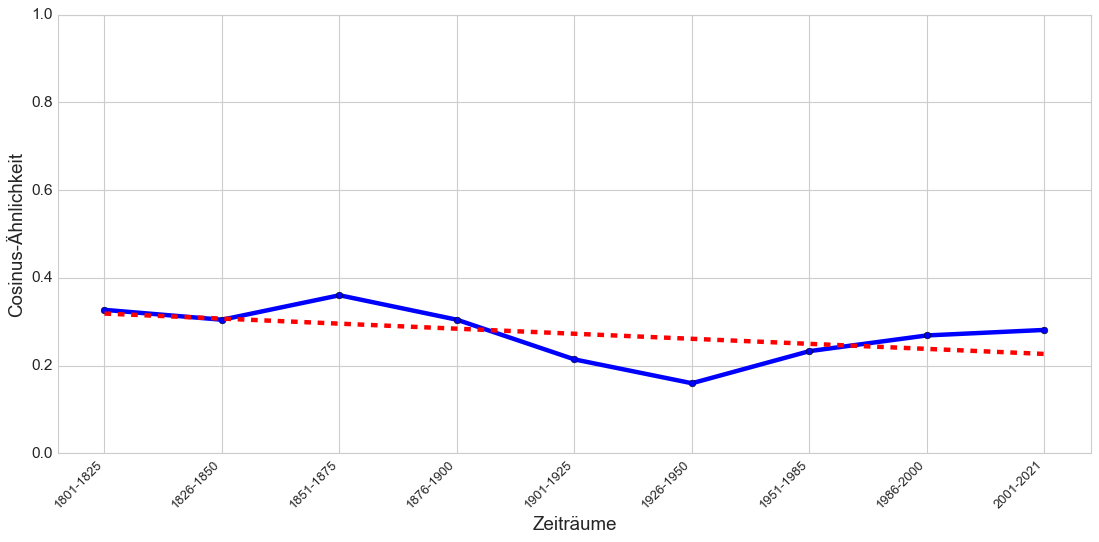

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [48]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [49]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

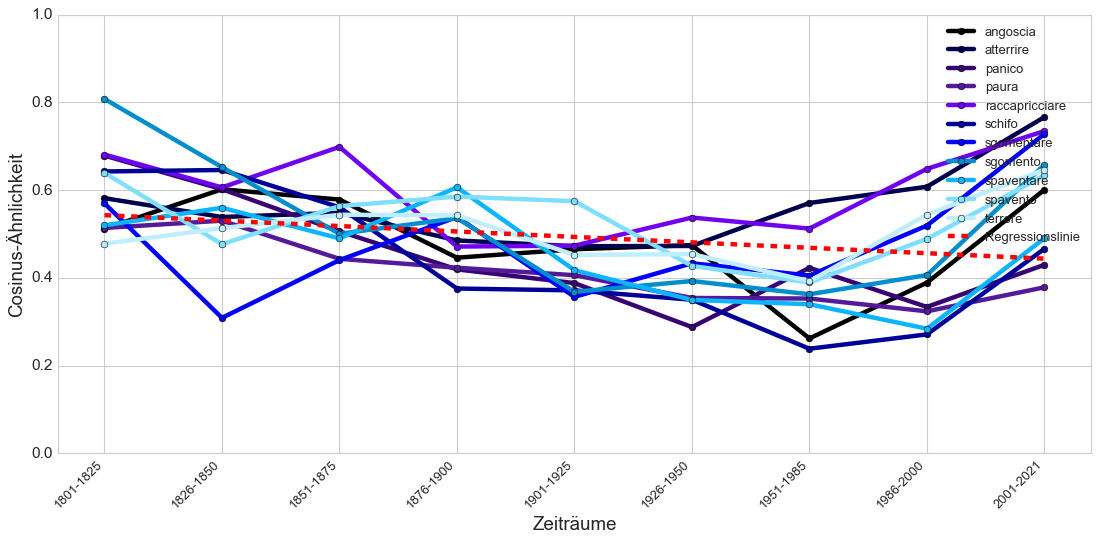

In [50]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

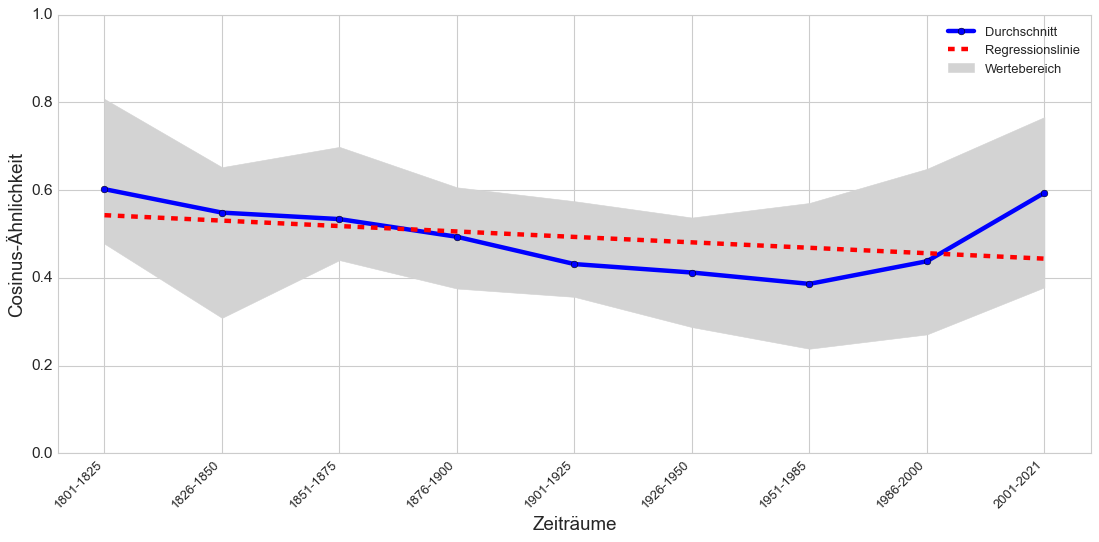

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [52]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(insultar, 0.8361287117004395)","(cocito, 0.8972721695899963)","(chino, 0.8541204333305359)","(grandine, 0.8470896482467651)","(orrendamente, 0.8157033324241638)","(scoverto, 0.6901739239692688)","(mutilare, 0.6645475029945374)","(avvide, 0.5965759754180908)","(sfigurato, 0.7204595804214478)","(mutilati, 0.8334557414054871)","(mutilare, 0.8613080382347107)"
1,"(mise, 0.8308154344558716)","(chiaror, 0.8946492075920105)","(sanguigna, 0.8508473634719849)","(rotto, 0.833221971988678)","(cadaverico, 0.8038332462310791)","(bargello, 0.682831346988678)","(orrendamente, 0.6509434580802917)","(abbandonasti, 0.5900410413742065)","(straziato, 0.7196927666664124)","(sfigurato, 0.8277108073234558)","(zee, 0.8251539468765259)"
2,"(ceffo, 0.8276438117027283)","(bieco, 0.8863430023193359)","(gel, 0.8471827507019043)","(affondare, 0.8257111310958862)","(sanguigno, 0.7995330691337585)","(disfatti, 0.6765810251235962)","(tracollaron, 0.6275067329406738)","(basta, 0.5851426124572754)","(memphis, 0.7113592028617859)","(mutilare, 0.8251294493675232)","(sahr, 0.8225263357162476)"
3,"(squarciate, 0.8236722350120544)","(fervid, 0.8859044313430786)","(intronare, 0.845909833908081)","(frantumi, 0.8217800855636597)","(mascella, 0.7797433733940125)","(terribilmente, 0.6646356582641602)","(imo, 0.6233017444610596)","(interrompendola, 0.5848500728607178)","(trasformarvisi, 0.7094154357910156)","(sfigurare, 0.8183861970901489)","(atrocemente, 0.8182774782180786)"
4,"(rasserena, 0.8171126246452332)","(teschio, 0.8833585381507874)","(nimiche, 0.8446038365364075)","(artiglierìe, 0.8207064270973206)","(averglieli, 0.7796127796173096)","(spaventosamente, 0.6642693281173706)","(notis, 0.6153303384780884)","(adunghiato, 0.5826972723007202)","(transessuale, 0.7074346542358398)","(dilaniare, 0.806513249874115)","(dolcemente, 0.8136354684829712)"
5,"(gerusalem, 0.8137457370758057)","(lacerate, 0.8832003474235535)","(sfinire, 0.8442572951316833)","(palischermi, 0.819168746471405)","(livido, 0.7776906490325928)","(sordamente, 0.659745991230011)","(contraendosi, 0.600882351398468)","(nudrita, 0.5810345411300659)","(persecutore, 0.7044099569320679)","(poveretto, 0.799738347530365)","(giacere, 0.81276935338974)"
6,"(roder, 0.8128654956817627)","(ultrice, 0.8816314935684204)","(brandire, 0.8437896966934204)","(fracasso, 0.8177455067634583)","(lacerare, 0.7773250937461853)","(percossa, 0.646632730960846)","(almea, 0.5984850525856018)","(impiastricciandosi, 0.5807029008865356)","(pantera, 0.7041419744491577)","(barbaramente, 0.7993302941322327)","(zii, 0.8089627623558044)"
7,"(sfida, 0.8122302293777466)","(rimbombo, 0.8809281587600708)","(adamantino, 0.8431410789489746)","(prore, 0.8140902519226074)","(spaventosamente, 0.7738587856292725)","(fiero, 0.646002471446991)","(tempia, 0.5957012176513672)","(rabbuffata, 0.5776146650314331)","(ammaestrare, 0.7023188471794128)","(mutilato, 0.7919144630432129)","(atterrire, 0.8065094947814941)"
8,"(angel, 0.8121173977851868)","(asperso, 0.8788293600082397)","(abbattuto, 0.8424637913703918)","(grandinare, 0.8139262199401855)","(dilatato, 0.7700042128562927)","(nerone, 0.6449339389801025)","(stramazzare, 0.5913798213005066)","(soffrire, 0.5770747661590576)","(ombelicale, 0.7016688585281372)","(sanguinolento, 0.7895953059196472)","(cloo, 0.8055797219276428)"
9,"(sultan, 0.8109862208366394)","(nari, 0.8782936334609985)","(batter, 0.8389476537704468)","(scheggia, 0.8139117956161499)","(digrignare, 0.7691190242767334)","(livido, 0.6367710828781128)","(schiumoso, 0.5895158052444458)","(ghigno, 0.5710983872413635)","(pestare, 0.7001245617866516)","(orrendamente, 0.7893331050872803)","(orrendamente, 0.8018870949745178)"


In [53]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.34827813506126404,
 '1751-1800': 0.30569422245025635,
 '1801-1825': 0.4192067086696625,
 '1826-1850': 0.25446462631225586,
 '1851-1875': 0.28740471601486206,
 '1876-1900': 0.35556480288505554,
 '1901-1925': 0.22415399551391602,
 '1926-1950': 0.19497697055339813,
 '1951-1985': 0.1957734078168869,
 '1986-2000': 0.35681310296058655,
 '2001-2021': 0.24000468850135803}

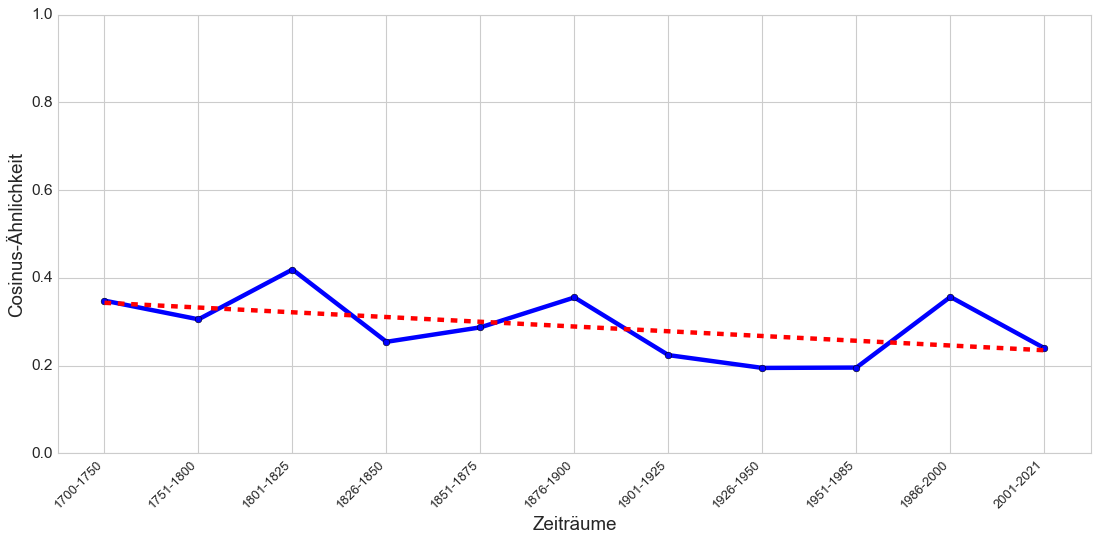

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [55]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [56]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

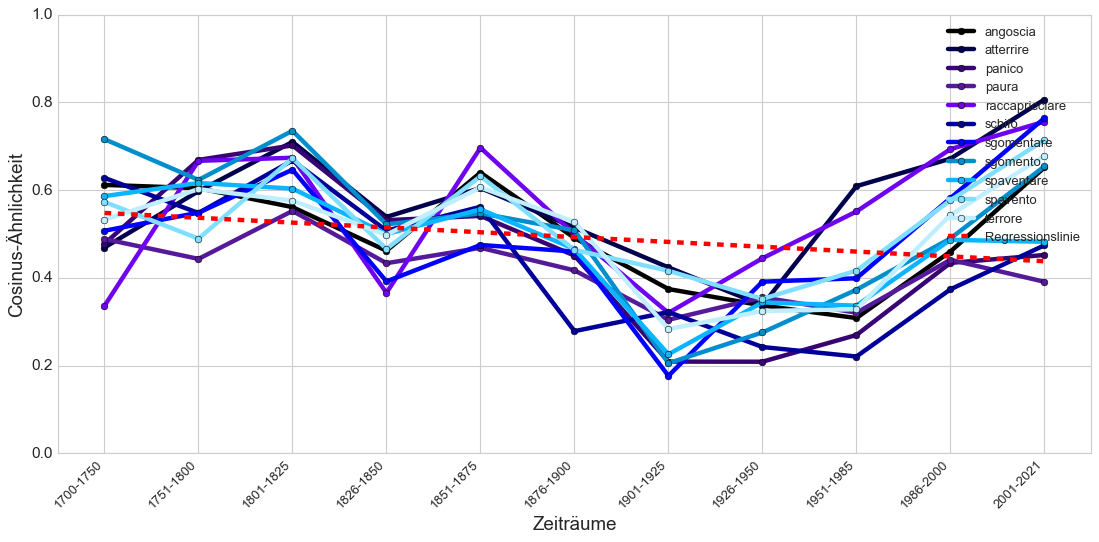

In [57]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

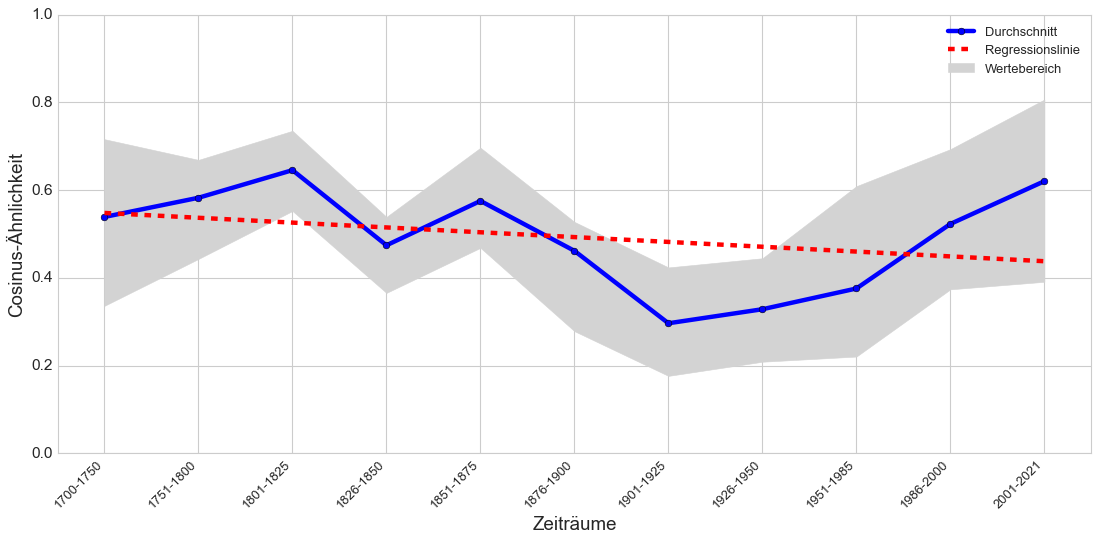

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [59]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(manete, 0.8181993961334229)",not in vocab,"(rovesciate, 0.9731760025024414)","(sudai, 0.9857907891273499)","(insepolto, 0.8991358280181885)","(argonauti, 0.8527508974075317)","(martellare, 0.6766839027404785)","(pavidità, 0.734078586101532)","(melma, 0.7614666819572449)","(inquinato, 0.7725265622138977)","(insapiens, 0.7780511975288391)"
1,"(sacrilega, 0.8170457482337952)",not in vocab,"(pignone, 0.9729324579238892)","(lasciatevi, 0.9842463731765747)","(bisognò, 0.8976436853408813)","(libeccio, 0.8515951037406921)","(stramazzare, 0.6747585535049438)","(calvario, 0.6691094040870667)","(immoto, 0.7571327686309814)","(vulnerabile, 0.7710050940513611)","(precarius, 0.7768689393997192)"
2,"(portentoso, 0.8121558427810669)",not in vocab,"(cozzavan, 0.9693341851234436)","(ogivale, 0.9837719202041626)","(disseppellire, 0.8872058391571045)","(invaso, 0.8061465620994568)","(ruggiva, 0.6717342138290405)","(pronunziarlo, 0.6619131565093994)","(schiacciare, 0.7338506579399109)","(spanna, 0.7657145261764526)","(spirale, 0.7707823514938354)"
3,"(pestilenza, 0.8102315068244934)",not in vocab,"(dicchi, 0.9630587100982666)","(tronca, 0.9835841655731201)","(stramazza, 0.885495126247406)","(imperversare, 0.7960187792778015)","(rovesciandolo, 0.6683735251426697)","(tanaglia, 0.6609067320823669)","(imponentissime, 0.7297504544258118)","(nuotare, 0.7640839219093323)","(distruttivo, 0.7705358862876892)"
4,"(mdcxciii, 0.8082149028778076)",not in vocab,"(spezzate, 0.9604276418685913)","(timidit, 0.9833495616912842)","(sentendoli, 0.8813076615333557)","(bufera, 0.7889475226402283)","(felino, 0.6398208737373352)","(avvicinatale, 0.6495915651321411)","(ciarliero, 0.7263369560241699)","(immerso, 0.7632099986076355)","(tetro, 0.7704154849052429)"
5,"(cappelli, 0.8057477474212646)",not in vocab,"(slanciasi, 0.9550732374191284)","(udì, 0.983266294002533)","(toccatemi, 0.8798020482063293)","(imbestialita, 0.7813758254051208)","(tempia, 0.6383023262023926)","(afrodisiaco, 0.6364450454711914)","(informe, 0.7251441478729248)","(mostruosamente, 0.7611511945724487)","(riconoscibile, 0.7675285339355469)"
6,"(tremuoto, 0.8011268973350525)",not in vocab,"(ammonticchiare, 0.954056978225708)","(abbrividita, 0.9832097887992859)","(inacerba, 0.8767993450164795)","(sordamente, 0.780274510383606)","(agonizzare, 0.6316927671432495)","(vorrete, 0.6308866143226624)","(poveramente, 0.7167915105819702)","(riscaldare, 0.7567865252494812)","(cosmico, 0.765629231929779)"
7,"(eruzione, 0.8006468415260315)",not in vocab,"(scompiglia, 0.9533686637878418)","(elegger, 0.9826977849006653)","(tanaglie, 0.8767408728599548)","(sbigottimento, 0.7794778347015381)","(dilatare, 0.6251069903373718)","(acremente, 0.6283860802650452)","(insensato, 0.7163575291633606)","(grandine, 0.7567406892776489)","(crosta, 0.7651568055152893)"
8,"(sformare, 0.7960330247879028)",not in vocab,"(goccian, 0.9528602361679077)","(accostarsele, 0.982681930065155)","(sfascio, 0.8764556050300598)","(atterrì, 0.7770819067955017)","(squarciare, 0.6249232888221741)","(contrarre, 0.6266487240791321)","(costellazione, 0.715204656124115)","(inesorabilmente, 0.7550944089889526)","(incombere, 0.763404369354248)"
9,"(mcdliii, 0.7959122657775879)",not in vocab,"(ignite, 0.9524241089820862)","(tenetelo, 0.9821954369544983)","(avvoltola, 0.8736215829849243)","(baleno, 0.7705589532852173)","(orrendamente, 0.624396800994873)","(ápici, 0.6255928874015808)","(indifeso, 0.7145564556121826)","(nausea, 0.7549250721931458)","(zii, 0.7563011646270752)"


In [60]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.4178731441497803,
 '1801-1825': 0.37271302938461304,
 '1826-1850': 0.5222641229629517,
 '1851-1875': 0.42297443747520447,
 '1876-1900': 0.38572296500205994,
 '1901-1925': 0.2902337610721588,
 '1926-1950': 0.220551997423172,
 '1951-1985': 0.38877829909324646,
 '1986-2000': 0.5054208040237427,
 '2001-2021': 0.5068764686584473}

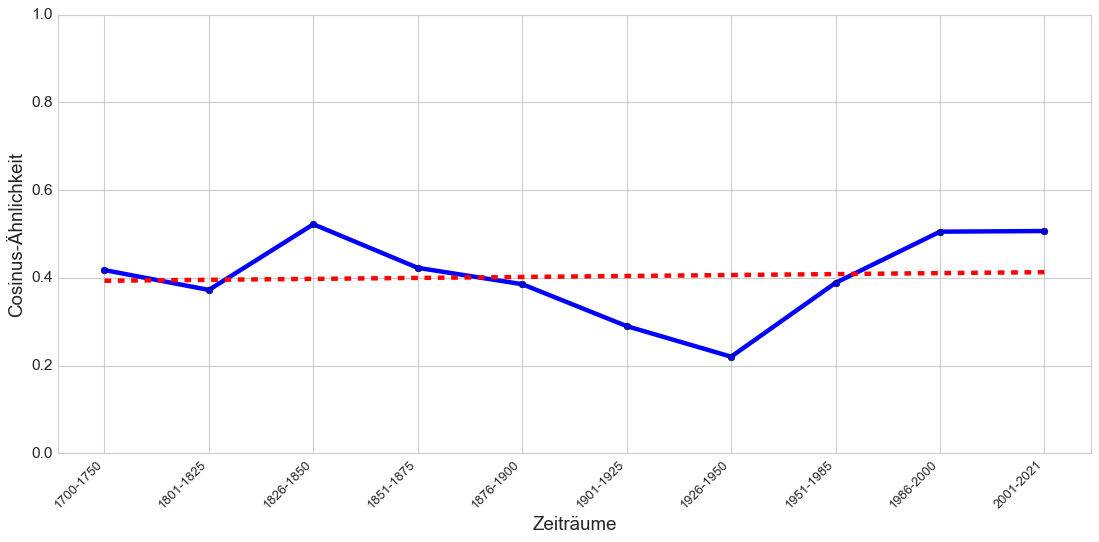

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [62]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [63]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

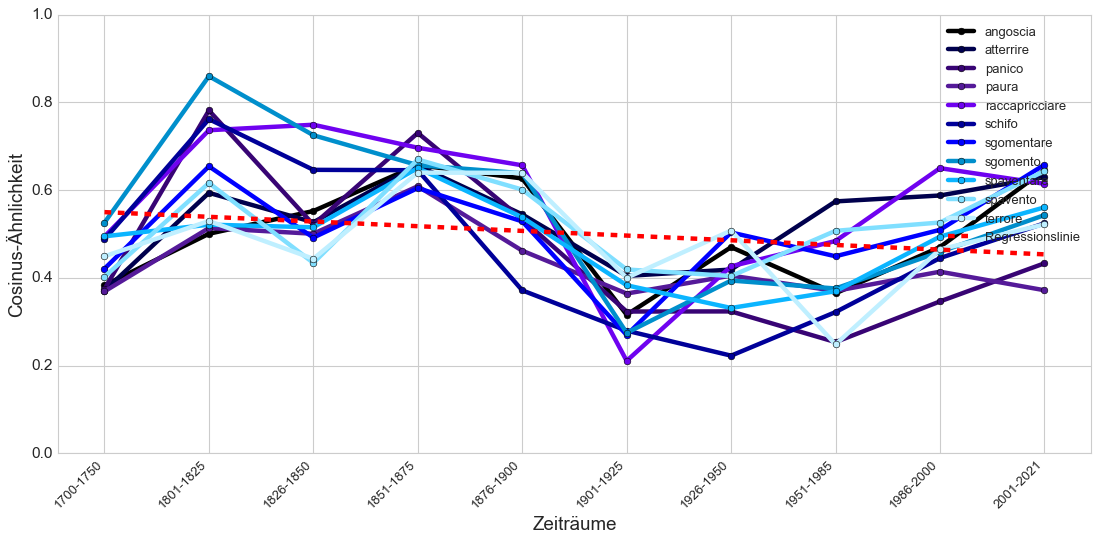

In [64]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

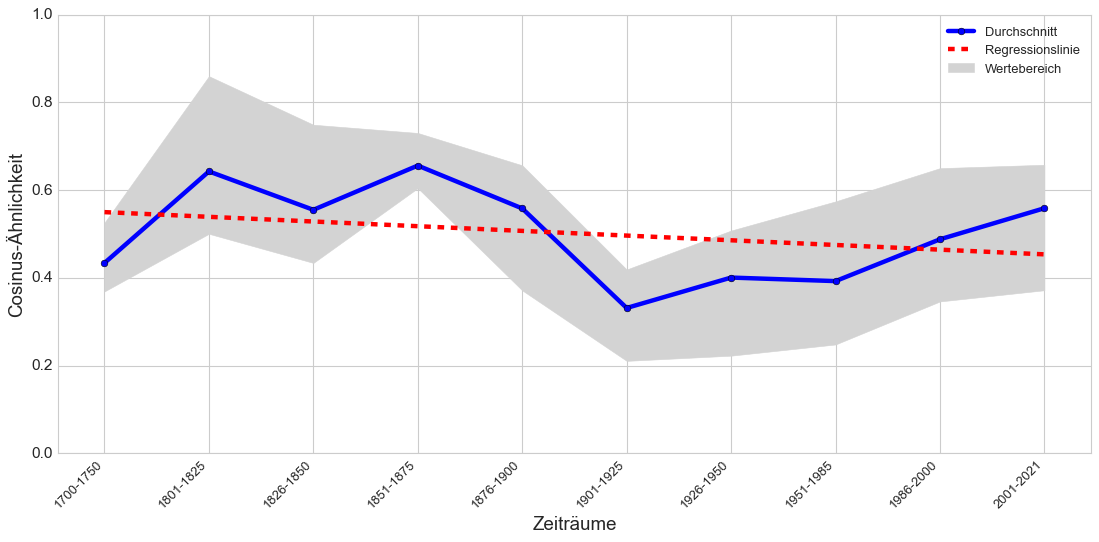

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [66]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(gant, 0.8705265522003174)","(giudei, 0.8008357286453247)","(sintoma, 0.9116107225418091)","(schweicuschi, 0.8324484825134277)","(ammutolire, 0.7860255241394043)","(invaso, 0.7469710111618042)","(caverna, 0.6453269124031067)","(incutere, 0.5958872437477112)","(antiborgesiano, 0.6886680722236633)","(umiltà, 0.7735244631767273)","(tremendamente, 0.7804206013679504)"
1,"(brick, 0.8601474165916443)","(atterrar, 0.7889444231987)","(soffrirle, 0.9049389362335205)","(menò, 0.8114150762557983)","(enigma, 0.7846119999885559)","(vacillare, 0.7463710904121399)","(topine, 0.6072185635566711)","(ninotto, 0.5934678316116333)","(ripiego, 0.6452040076255798)","(tifo, 0.7617517113685608)","(atterrì, 0.7620810270309448)"
2,"(bey, 0.8593525886535645)","(winck, 0.776686429977417)","(candeletta, 0.9031314253807068)","(schioppi, 0.7928730249404907)","(convulsione, 0.7839439511299133)","(angoscioso, 0.7440624833106995)","(fiero, 0.5709192752838135)","(sciupato, 0.5894153118133545)","(labilmente, 0.6394171118736267)","(inguaribile, 0.7570310831069946)","(rassegnazione, 0.7537826895713806)"
3,"(burrasca, 0.8588739633560181)","(fuldenses, 0.7765191197395325)","(atterrirla, 0.8993571996688843)","(kur, 0.7908515930175781)","(cangiarsi, 0.7820624113082886)","(sbigottimento, 0.740243136882782)","(loris, 0.5581759810447693)","(incosciente, 0.5869744420051575)","(toilette, 0.639404296875)","(maledettamente, 0.7535902857780457)","(emotività, 0.749597430229187)"
4,"(spianate, 0.8550451397895813)","(laureshamenses, 0.7713108658790588)","(previdente, 0.8964681625366211)","(maltrattati, 0.7790989875793457)","(involontario, 0.7816643118858337)","(parossismo, 0.7376643419265747)","(indicibili, 0.5534328818321228)","(nominargli, 0.5867851376533508)","(improvvisatore, 0.6231933832168579)","(sofferente, 0.7483530640602112)","(angosciante, 0.7449026107788086)"
5,"(panro, 0.8539661765098572)","(idoli, 0.7640617489814758)","(bollore, 0.896443784236908)","(saettare, 0.7764093279838562)","(valenzia, 0.7805176377296448)","(sanguinoso, 0.7368642687797546)","(agitazione, 0.5395902395248413)","(andromaco, 0.5863121747970581)","(insopportabile, 0.6063942313194275)","(qualcuna, 0.7460159659385681)","(sequela, 0.7402454018592834)"
6,"(fortino, 0.8538735508918762)","(commodo, 0.762790858745575)","(assopire, 0.8964042663574219)","(spagnoli, 0.774484395980835)","(interpellanza, 0.776928722858429)","(divoratore, 0.7346824407577515)","(fervido, 0.5325995683670044)","(sprezzante, 0.5861827731132507)","(guidatore, 0.6006022095680237)","(lucescu, 0.7459706664085388)","(intelletto, 0.7387956380844116)"
7,"(baloardi, 0.853496253490448)","(rashid, 0.7566759586334229)","(lentissimamente, 0.8949117660522461)","(inavvedutamente, 0.7736607193946838)","(articolare, 0.7753010988235474)","(sordamente, 0.7341095209121704)","(accasciare, 0.527714729309082)","(passacantando, 0.5848141312599182)","(orma, 0.5981737971305847)","(involuzione, 0.7454473376274109)","(impotenza, 0.7376581430435181)"
8,"(sfilare, 0.8522623777389526)","(appiè, 0.7562723755836487)","(soprastare, 0.8947905898094177)","(formica, 0.7734423875808716)","(ansiet, 0.7750075459480286)","(fulmineo, 0.7318841814994812)","(seguiredire, 0.5260948538780212)","(oraziu, 0.5843707323074341)","(sirolo, 0.5979723334312439)","(arretrare, 0.7447722554206848)","(moralmente, 0.7372809052467346)"
9,"(lodigiano, 0.851888120174408)","(richieditor, 0.7555425763130188)","(svogliatezza, 0.8946980834007263)","(cagnesco, 0.7722824215888977)","(schianto, 0.7725403308868408)","(pertinace, 0.7309411764144897)","(indescrivibile, 0.523102343082428)","(incomposto, 0.5825254917144775)","(indigenza, 0.5923299193382263)","(smarrire, 0.743556022644043)","(tormento, 0.7366333603858948)"


In [67]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.4101347327232361,
 '1751-1800': 0.32291272282600403,
 '1801-1825': 0.5508654713630676,
 '1826-1850': 0.4233066141605377,
 '1851-1875': 0.43224599957466125,
 '1876-1900': 0.3767881393432617,
 '1901-1925': 0.31972241401672363,
 '1926-1950': 0.22557204961776733,
 '1951-1985': 0.39946749806404114,
 '1986-2000': 0.5305419564247131,
 '2001-2021': 0.4760842025279999}

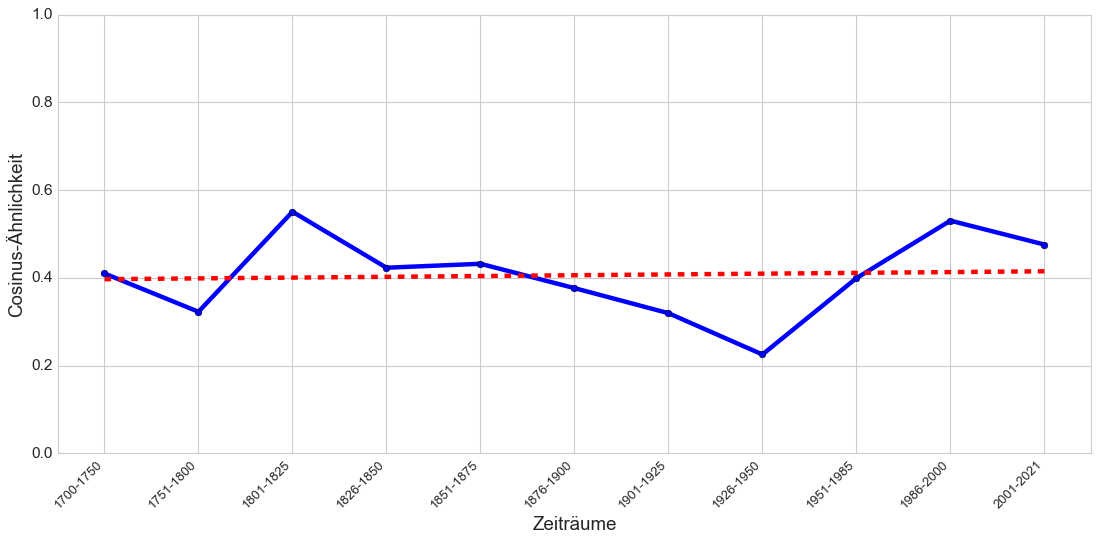

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')


plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

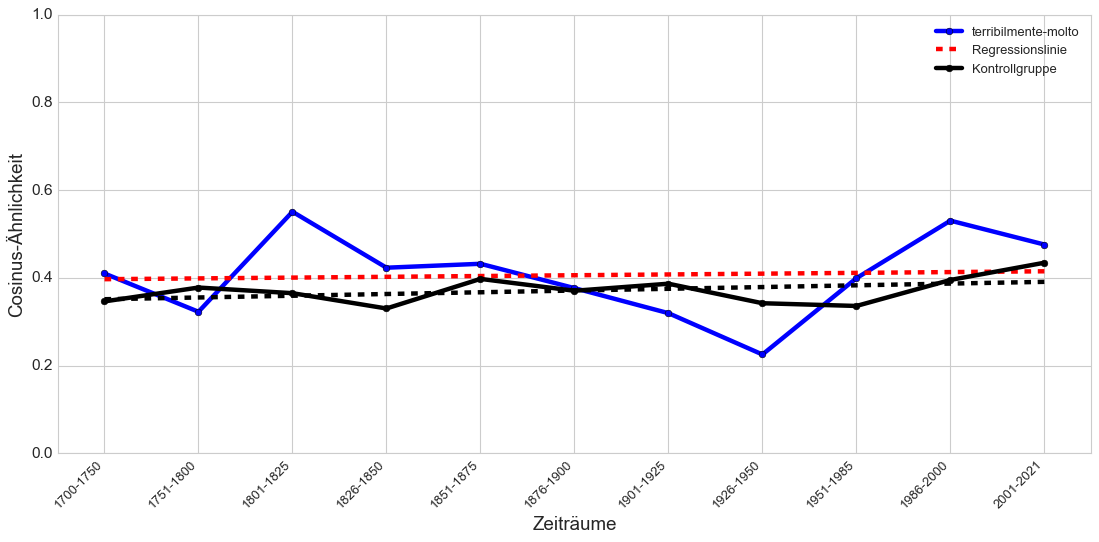

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [70]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [71]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

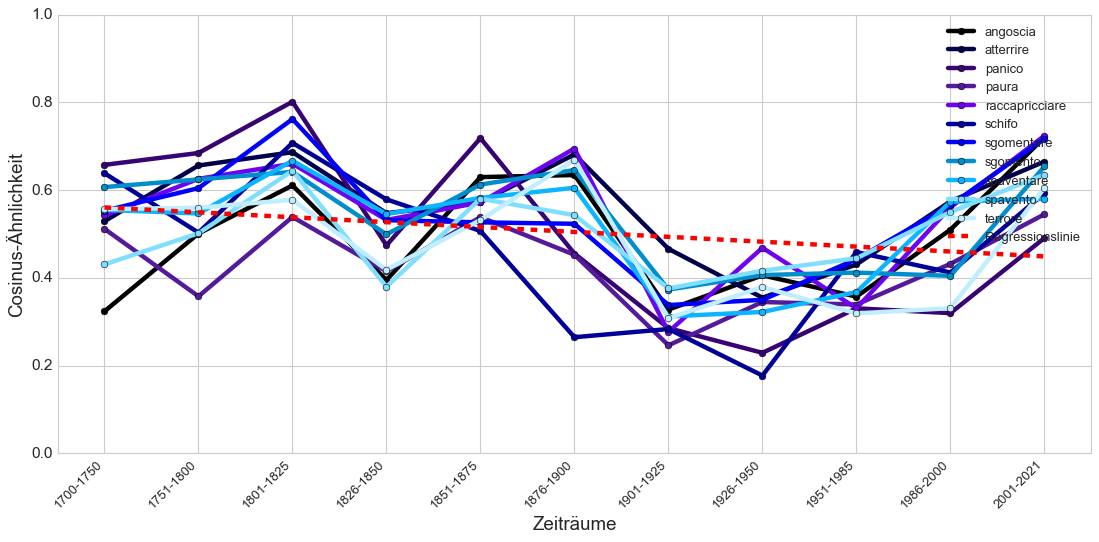

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

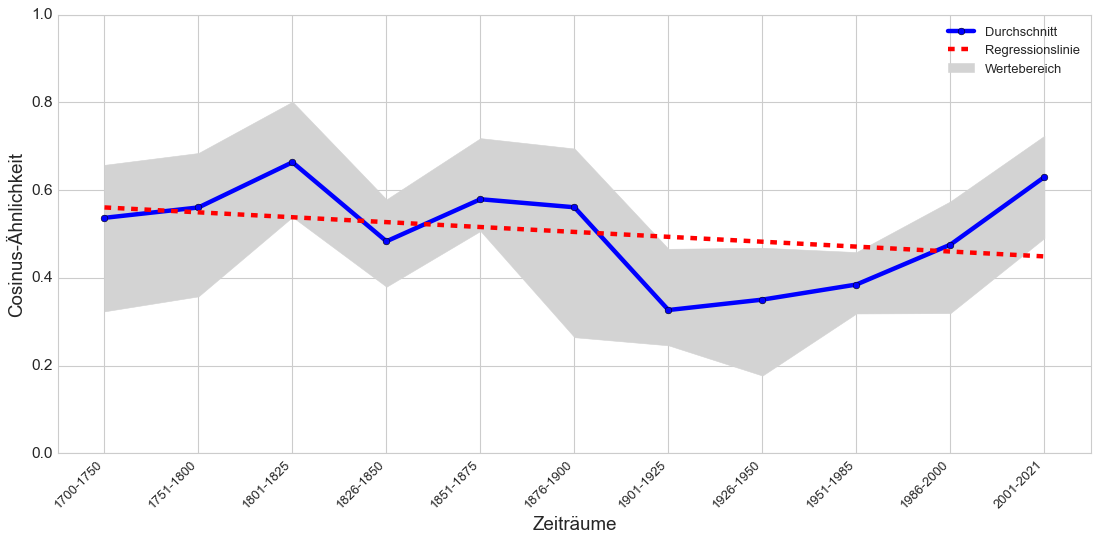

In [73]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [74]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(prorompean, 0.9688913822174072)",not in vocab,"(sgorgare, 0.8337093591690063)","(dipartire, 0.8430203795433044)","(ripulse, 0.8601700067520142)","(ascoltami, 0.761459469795227)","(demoralizzare, 0.7403537631034851)","(inguaribile, 0.7338079810142517)","(sfuggente, 0.8057450652122498)"
1,not in vocab,not in vocab,"(arretrosse, 0.967470109462738)",not in vocab,"(pulsazione, 0.8223958611488342)","(marchio, 0.8275941014289856)","(inenarrabile, 0.8412169814109802)","(confortarla, 0.753675639629364)","(manovrata, 0.7346428632736206)","(complicare, 0.7278748750686646)","(distorta, 0.7887455821037292)"
2,not in vocab,not in vocab,"(ferirla, 0.9674437642097473)",not in vocab,"(rovente, 0.8191487193107605)","(comprimere, 0.8135736584663391)","(fermezza, 0.8347469568252563)","(saru, 0.746010959148407)","(modestamente, 0.7345360517501831)","(terribilmente, 0.7258815765380859)","(leggerezza, 0.7841609716415405)"
3,not in vocab,not in vocab,"(espugnar, 0.9672010540962219)",not in vocab,"(roso, 0.819065272808075)","(ferocia, 0.8118975162506104)","(livore, 0.8308397531509399)","(imbriani, 0.7450556755065918)","(conservandosi, 0.7341843247413635)","(travagliare, 0.7226128578186035)","(aforisma, 0.7823445200920105)"
4,not in vocab,not in vocab,"(morìa, 0.9667758345603943)",not in vocab,"(fortunata, 0.8170064091682434)","(disdegno, 0.7991735935211182)","(degradazione, 0.8306264281272888)","(intimidisce, 0.740642786026001)","(mariolino, 0.7339617013931274)","(rovesciata, 0.7201584577560425)","(emotività, 0.782263994216919)"
5,not in vocab,not in vocab,"(rocche, 0.9666101336479187)",not in vocab,"(inaridire, 0.8137453198432922)","(contrazione, 0.7934253215789795)","(siil, 0.8303139209747314)","(fiacco, 0.7393098473548889)","(estirpare, 0.7334714531898499)","(baricentro, 0.7166429162025452)","(terribilmente, 0.7804206609725952)"
6,not in vocab,not in vocab,"(malmorre, 0.9662402868270874)",not in vocab,"(udranno, 0.8103731870651245)","(divinamente, 0.7924718260765076)","(avviticchiare, 0.8302839994430542)","(palpitiamo, 0.7343230247497559)","(boom, 0.7316999435424805)","(heynckes, 0.7135021686553955)","(ingabbiare, 0.7799196243286133)"
7,not in vocab,not in vocab,"(porrassi, 0.9658868908882141)",not in vocab,"(avvincere, 0.8103583455085754)","(irrimediabilmente, 0.7897672653198242)","(ammirandone, 0.8298993706703186)","(soffocazione, 0.7333184480667114)","(illogico, 0.7295919060707092)","(rivalsa, 0.709958553314209)","(moralmente, 0.7792783379554749)"
8,not in vocab,not in vocab,"(aspettate, 0.9658839106559753)",not in vocab,"(rifluire, 0.8069005608558655)","(tecla, 0.7893845438957214)","(indomabile, 0.8284982442855835)","(intendi, 0.7326616644859314)","(larvato, 0.7238927483558655)","(laudrup, 0.7098708152770996)","(riconoscibile, 0.7782498002052307)"
9,not in vocab,not in vocab,"(carpone, 0.9652787446975708)",not in vocab,"(spasmodico, 0.8068539500236511)","(imaginava, 0.7859671115875244)","(darvinismo, 0.8283305764198303)","(scantari, 0.7323609590530396)","(inadeguato, 0.7237759828567505)","(recuperabile, 0.7094622254371643)","(ingenuo, 0.777167558670044)"


In [75]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.4424329102039337,
 '1851-1875': 0.3755466341972351,
 '1876-1900': 0.41714006662368774,
 '1901-1925': 0.38655972480773926,
 '1926-1950': 0.2638007402420044,
 '1951-1985': 0.3932698369026184,
 '1986-2000': 0.5506593585014343,
 '2001-2021': 0.5523945093154907}

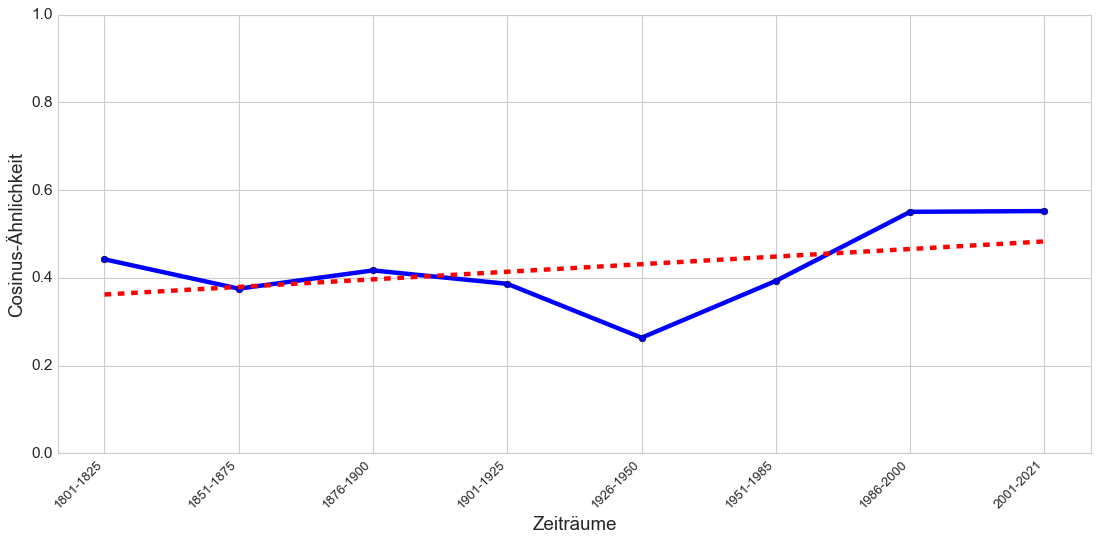

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [77]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [78]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

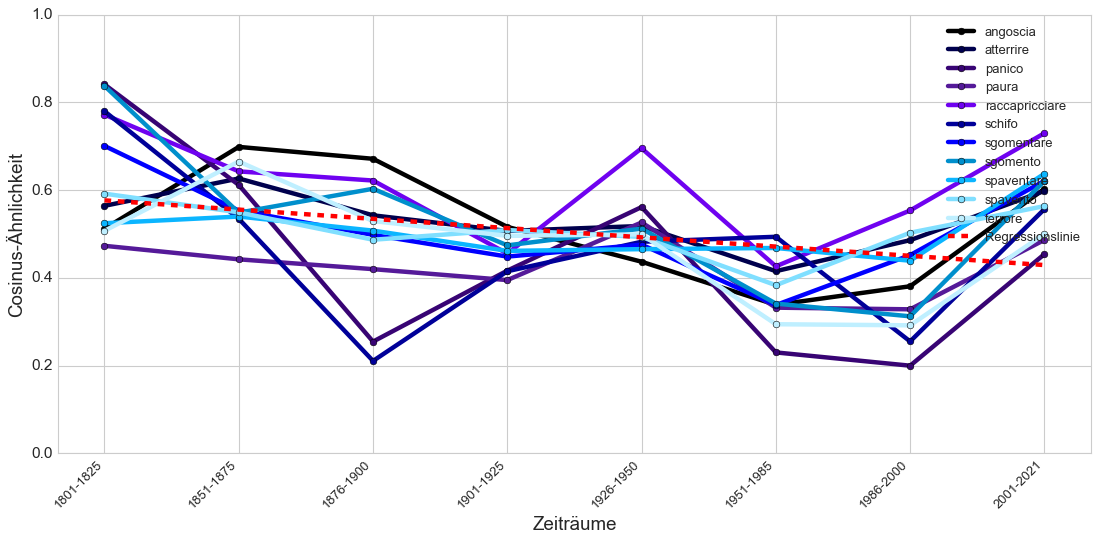

In [79]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

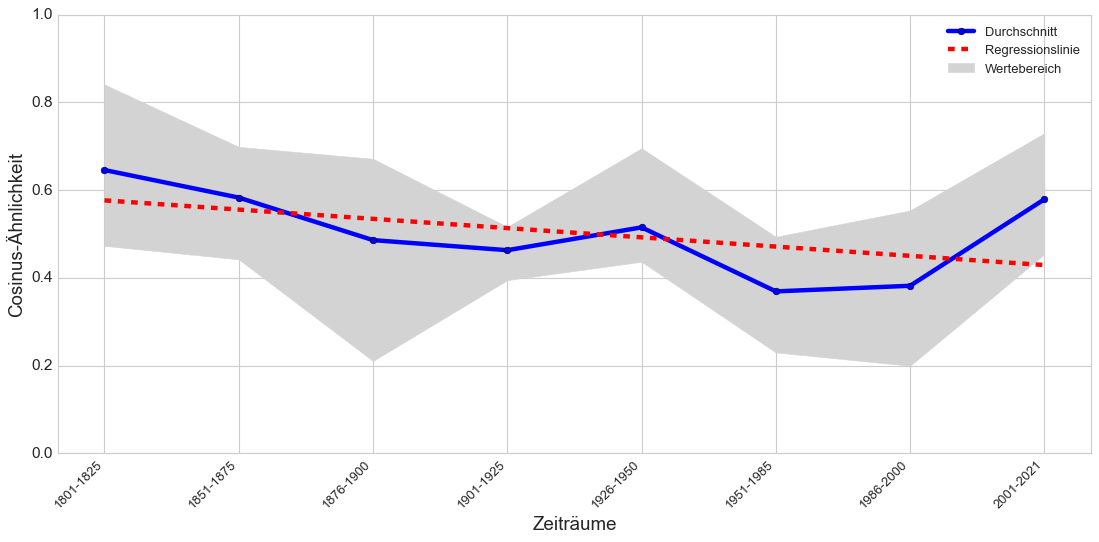

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()